In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits import mplot3d

In [64]:
with h5py.File('turf.h5', 'r') as fd:
    pts = fd['fields/coords'][:]

def plot3d():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # ax.axes.set_xlim3d(left=-2, right=10)
    # ax.axes.set_ylim3d(bottom=0, top=10)
    # ax.axes.set_zlim3d(bottom=0, top=10)
    ax.set_xlabel('Axial (x)')
    ax.set_ylabel('Radial (y)')
    ax.set_zlabel('Transverse (z)')
    ax.xaxis.set_pane_color((1, 1, 1, 0))
    ax.yaxis.set_pane_color((1, 1, 1, 0))
    ax.zaxis.set_pane_color((1, 1, 1, 0))
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    return fig, ax

Ndomain = 8                # Number of subdomains
Ndim = 3                   # Number of physical dimensions
sub_shape = (50, 50, 60)   # Subdomain shape
pts.shape

(150000, 3, 8)

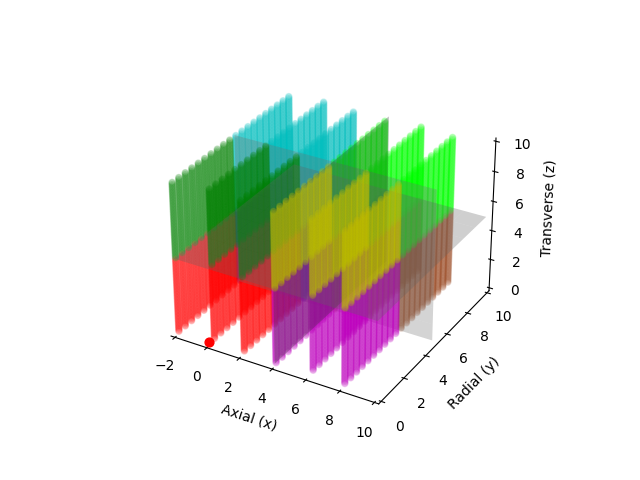

In [22]:
# Plot the 8 subdomains on one graph
fig, ax = plot3d()

# Gray dividing planes
X, Z = np.meshgrid(np.linspace(-2, 10, 10), np.linspace(0, 10, 10))
ax.plot_surface(X, 5, Z, color=(0.5, 0.5, 0.5), alpha=0.3)
Y, Z = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
ax.plot_surface(4, Y, Z, color=(0.5, 0.5, 0.5), alpha=0.3)
X, Y = np.meshgrid(np.linspace(-2, 10, 10), np.linspace(0, 10, 10))
ax.plot_surface(X, Y, 5*np.ones(X.shape), color=(0.5, 0.5, 0.5), alpha=0.3)

# Thruster location
ax.scatter(0, 0, 0, color='r', s=40)

# Subdomains
skip = 100
sl = slice(0, pts.shape[0], skip)
c = ['r', 'g', 'b', 'c', 'm', 'y', 'sienna', 'lime']
labels = ['000', '001', '010', '011', '100', '101', '110', '111']
for i in range(pts.shape[-1]):
    ax.scatter(pts[sl, 0, i], pts[sl, 1, i], pts[sl, 2, i], color=c[i], label=labels[i], alpha=0.2)

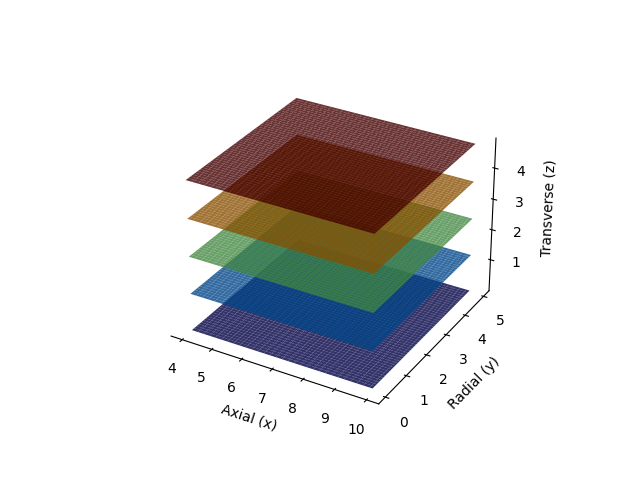

In [101]:
permute_axes = (2, 1, 0, 3, 4)                        # To go from (Z,Y,X,Ndim,Ndomain) to (X,Y,Z,Ndim,Ndomain)
pts3d = pts.reshape(sub_shape + (Ndim, Ndomain))      # This array comes out as (Z, Y, X, 3d, Ndomain)
pts3d = np.transpose(pts3d, axes=permute_axes)        # Now in the order (X,Y,Z, 3d, Ndomain)

# Plot z-slices for first domain
domain_idx = 4
pts_d1 = pts3d[..., domain_idx] 
Nz = pts_d1.shape[2]
step = int(Nz / 4)
slice_idx = np.arange(0, Nz ,step)

fig, ax = plot3d()
colors = plt.get_cmap('jet')(np.linspace(0, 1, len(slice_idx)))
for i, sl in enumerate(slice_idx):
    X = pts_d1[:, :, sl, 0]
    Y = pts_d1[:, :, sl, 1]
    Z = pts_d1[:, :, sl, 2]
    ax.plot_surface(X, Y, Z, color=colors[i], alpha=0.8)